In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load data
df = pd.read_excel("./raw_data/Fed_CO_2000Q1_2025Q4.xlsx",
            skiprows=6,usecols=[0,3,8])
df_fed = df.rename(columns={"Time Period": "Quarter", "STFBQCB%STFBAILB_XS1A2_MA.Q": "Wholesale_Proxy_NCO", "STFBQCCC%STFBAILCC_XS1A2_MA.Q": "Retail_Proxy_NCO"})   

df_fed['Quarter_dt'] = pd.PeriodIndex(df_fed['Quarter'], freq='Q').to_timestamp()

df_fed = df_fed.set_index('Quarter_dt').sort_index()
df_fed = df_fed.drop(columns=['Quarter'])

for col in df_fed.columns:
    df_fed[col] = (
        df_fed[col]
        .astype(str)
        .str.replace('%','', regex=False)
    )
    df_fed[col] = pd.to_numeric(df_fed[col], errors='coerce') / 100

df_fed      

,Wholesale_Proxy_NCO,Retail_Proxy_NCO
Quarter_dt,,
2000-01-01,0.0059,0.0411
2000-04-01,0.0070,0.0378
2000-07-01,0.0071,0.0386
2000-10-01,0.0098,0.0406
2001-01-01,0.0111,0.0437
...,...,...
2024-07-01,0.0057,0.0458
2024-10-01,0.0050,0.0452
2025-01-01,0.0056,0.0426


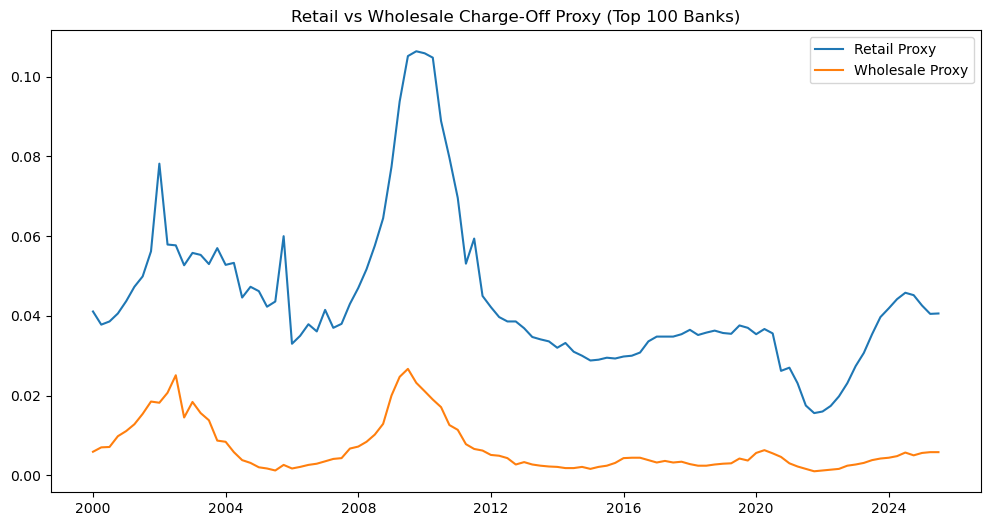

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df_fed.index, df_fed["Retail_Proxy_NCO"], label="Retail Proxy")
plt.plot(df_fed.index, df_fed["Wholesale_Proxy_NCO"], label="Wholesale Proxy")

plt.legend()
plt.title("Retail vs Wholesale Charge-Off Proxy (Top 100 Banks)")
plt.show()
